In [2]:
import numpy as np
import cv2
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import os

In [63]:
# directory_path = 'D:\MtechAssignments\DLCV\dataset/training'
# # if os.path.exists(directory_path):
# #     os.chdir(directory_path)
# #     file_path = os.path.join(directory_path,"training")
# #     print(file_path)
# #     os.chdir(file_path)
# #     print(os.getcwd())
# #     print("Directory exists!")
# # else:
# #     print("Directory does not exist!")

In [3]:
def Read_images(directory_path):
    i=0
    images = []
    for folders in os.listdir(directory_path):
        
        # print("Folder:", folders)
        file_path = os.path.join(directory_path,folders)
        # print("File_path:", file_path)

        for file in os.listdir(file_path):
            
            img_path = os.path.join(file_path,f"{file}")
            img = cv2.imread(img_path)
            
            if img is not None:

                img = cv2.resize(img,(256,256))
                img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
                #print(img)
                # if i<6:
                    # print(img_path)
                    # plt.imshow(img)
                    # plt.axis('off')  # Turn off axis numbers and ticks
                    # plt.show()
                    # print(img.shape)
                
                images.append((folders,img))
                i+=1
        
    return images

In [65]:

# def Read_images(directory_path):
#     i=0
#     images = []
#     for files in os.listdir(directory_path):
#         img_path = os.path.join(directory_path,f"{files}")
#         img = cv2.imread(img_path)
#         img = cv2.resize(img,(256,256))
#         img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
#         #print(img)
#         if i<6:
#             print(img_path)
#             # plt.imshow(img)
#             # plt.axis('off')  # Turn off axis numbers and ticks
#             # plt.show()
#             print(img.shape)
#         images.append(img)
#         i+=1

#     return images

In [4]:
# D:\MtechAssignments\DLCV\dataset\training\16.jpg
directory_train_path = 'training_set'
directory_test_path = 'test_set'
images = Read_images(directory_train_path)
images_test = Read_images(directory_test_path)
#print(images_test.shape)
print("Length of Train Images: ",len(images))
print("Length of Test Images: ",len(images_test))
# print(images[0:2])
# print(images)
if isinstance(images, list):
    print("Variable is a list")

if isinstance(images, np.ndarray):
    print("Variable is a list")

print(images[0])

Length of Train Images:  900
Length of Test Images:  100
Variable is a list
('beaches', array([[ 47,  46,  46, ...,  50,  52,  51],
       [ 48,  47,  47, ...,  50,  48,  50],
       [ 49,  48,  48, ...,  53,  53,  55],
       ...,
       [ 65,  32,  95, ..., 152, 154, 152],
       [ 65,  23,  84, ..., 160, 151, 157],
       [ 80,  21,  84, ..., 148, 156, 153]], dtype=uint8))


In [5]:
def get_pixel(img, center, x, y): 
      
    new_value = 0
      
    try: 
        if img[x][y] >= center: 
            new_value = 1
              
    except: 
        pass
      
    return new_value 
   
def lbp_calculated_pixel(img, x, y): 
   
    center = img[x][y] 
    val_ar = [] 
    val_ar.append(get_pixel(img, center, x-1, y-1)) 
    val_ar.append(get_pixel(img, center, x-1, y)) 
      
    val_ar.append(get_pixel(img, center, x-1, y + 1)) 
    val_ar.append(get_pixel(img, center, x, y + 1)) 

    val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
    val_ar.append(get_pixel(img, center, x + 1, y)) 

    val_ar.append(get_pixel(img, center, x + 1, y-1))  
    val_ar.append(get_pixel(img, center, x, y-1)) 

    power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
   
    val = 0
      
    for i in range(len(val_ar)): 
        val += val_ar[i] * power_val[i] 
          
    return val 

In [6]:
def extract_lbp_features(images):
    lbp_features = []
    classes = []
    p=0
    for clases,img in images:
        img_lbp = np.zeros((256, 256),np.uint8) 

        for i in range(0, 256): 
            for j in range(0, 256): 
                img_lbp[i, j] = lbp_calculated_pixel(img, i, j)

        lbp_features.append(img_lbp.flatten())
        classes.append(clases)
    return np.array(lbp_features),classes

feature_matrix ,classes = extract_lbp_features(images)
print(feature_matrix.shape)


(900, 65536)


In [7]:
print(feature_matrix[0])

[243 253 254 ... 143   5 130]


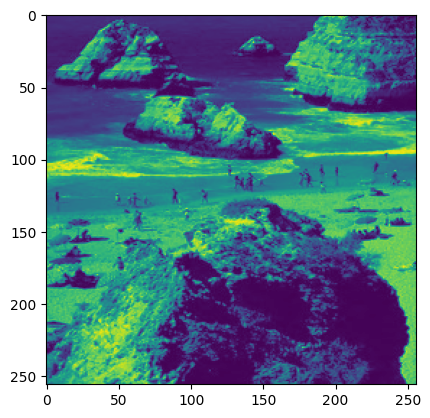

In [10]:
plt.imshow(images_test[9][1])
plt.show()

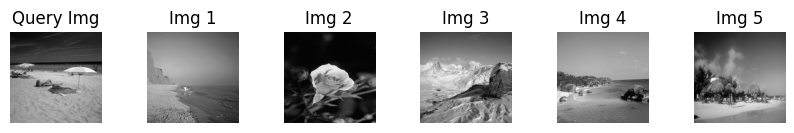

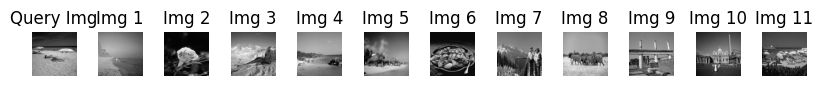

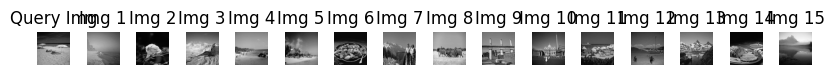

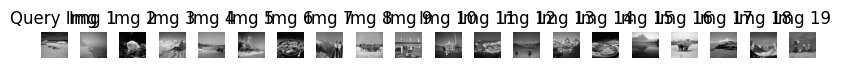

In [11]:
def knn_retrieve(query_features, feature_matrix, k=5):
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(feature_matrix)
    distances, indices = nbrs.kneighbors([query_features])
    return distances, indices

# index = np.random.randint(0,600)
# print(index)

query_label,query_image =  images_test[3] 
# print(query_label)
# print(query_image)

query_features, class1 = extract_lbp_features([(query_label,query_image)])


ks = [5,11,15,19]
precisions = []
recalls = []

for k in ks:
    distances, indices = knn_retrieve(query_features[0], feature_matrix, k)
    nearest_images = [images[i] for i in indices[0]]

    plt.figure(figsize=(10, 5))
    plt.subplots_adjust(wspace=0.5) 

    plt.subplot(1, k + 1, 1)
    plt.imshow(query_image, cmap='gray')
    plt.title('Query Img')
    plt.axis('off')

    count = 0
    
    for i, (label, image) in enumerate(nearest_images):
        plt.subplot(1, k + 1, i + 2)
        plt.imshow(image, cmap='gray')
        plt.title(f'Img {i + 1}')
        plt.axis('off')

        if label == query_label:
            count+=1

    precision = count/k
    precisions.append(precision)
    recall = count/90
    recalls.append(recall)
    plt.show()

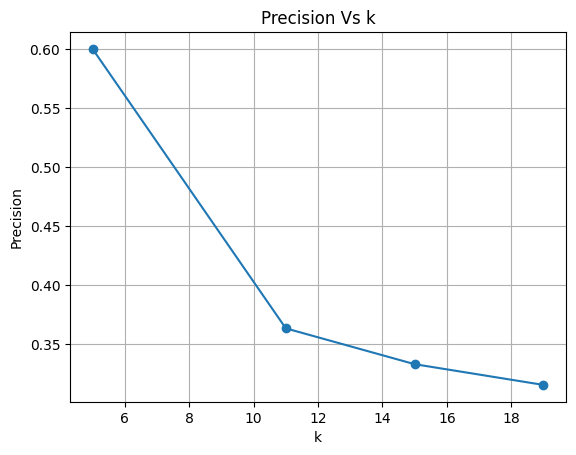

In [12]:
# #precision and Recall
# val = int(index)/int(100)
# print(int(val))
plt.plot(ks,precisions,marker='o')
plt.title("Precision Vs k")
plt.xlabel("k")
plt.ylabel("Precision")
plt.grid(True)
plt.show()

In [138]:
for k,precision,recall in zip(ks,precisions,recalls):
    print("K:",k,"Precision: ",precision,"Recall: ",recall)

K: 5 Precision:  0.6 Recall:  0.03333333333333333
K: 11 Precision:  0.36363636363636365 Recall:  0.044444444444444446
K: 15 Precision:  0.3333333333333333 Recall:  0.05555555555555555
K: 19 Precision:  0.3157894736842105 Recall:  0.06666666666666667


In [13]:

def knn_retrieve(query_features, feature_matrix, k=5):
    nbrs = NearestNeighbors(n_neighbors=k, metric='euclidean').fit(feature_matrix)
    distances, indices = nbrs.kneighbors([query_features])
    return distances, indices

# index = np.random.randint(0,600)
# print(index)
mean_precisions = []
mean_recalls = []
for k in range(3,91):

    precisions = []
    recalls = []

    for ind in range(0,5):

        query_label,query_image =  images_test[ind] 
        # print(query_label)
        # print(query_image)

        query_features, class1 = extract_lbp_features([(query_label,query_image)])

        distances, indices = knn_retrieve(query_features[0], feature_matrix, k)
        nearest_images = [images[i] for i in indices[0]]
    
        count = 0
            
        for i, (label, image) in enumerate(nearest_images):
            # plt.subplot(1, k + 1, i + 2)
            # plt.imshow(image, cmap='gray')
            # plt.title(f'Img {i + 1}')
            # plt.axis('off')
            if label == query_label:
                count+=1

        precision = count/k
        precisions.append(precision)
        recall = count/90
        recalls.append(recall)

    precisions = np.array(precisions)
    precision = np.mean(precisions)
    recalls = np.array(recalls)
    recall = np.mean(recalls)
        #plt.show()
    mean_precisions.append(precision)
    mean_recalls.append(recall)

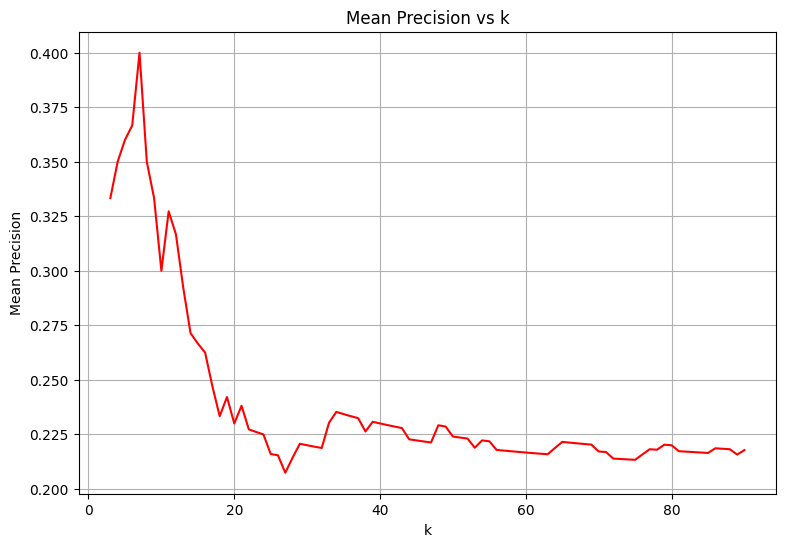

In [19]:
k_values = list(range(3, 91))

plt.figure(figsize=(9, 6))
plt.plot(k_values, mean_precisions,color='r')
plt.title('Mean Precision vs k')
plt.xlabel('k')
plt.ylabel('Mean Precision')
plt.grid(True)
plt.show()